# Project: Investigate TMDb Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
### We will try to analyze the data to find anwsers to the following questions: ###
* #### Which genres are most popular?
* #### Which genres are most popular from year to year?
* #### What genres are the most profitable?
* #### What kinds of properties are associated with movies that have high revenues?


<a id='intro'></a>
## Introduction

In [173]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [99]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [100]:
df.shape

(10866, 21)

In [101]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [103]:
# use id as index
df.set_index('id', inplace=True)

In [104]:
# only consider features interested in
# df = df[['popularity', 'runtime', 'genres', 'release_date', 'vote_count',
#        'vote_average', 'release_year', 'budget_adj', 'revenue_adj']]
df = df[['popularity', 'cast', 'director', 'runtime', 'genres', 'release_date', 
        'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']]

In [107]:
# check for columns with missing values
df.isnull().sum()

# rows with missing genres
# df[df.genres.isnull()]

popularity      0
cast            0
director        0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [106]:
# since there are only 23 rows with missing genres, we will remove those rows
df.dropna(inplace=True)

In [10]:
df.head()

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [108]:
# break down genres into indicator variables
# https://stackoverflow.com/questions/48010030/create-multiple-new-columns-based-on-pipe-delimited-column-in-pandas
genres_dummies = df.genres.str.get_dummies().add_prefix('genre_')
df = df.merge(genres_dummies, left_index=True, right_index=True)

In [109]:
# drop original genres
df.drop('genres', axis=1, inplace=True)

In [110]:
df.head()

,popularity,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,1.234890,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,98,12/25/95,293,6.4,1995,5.723867e+06,6.153158e+06,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.815631,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,Stephen Hopkins,110,10/15/93,36,6.4,1993,0.000000e+00,1.832034e+07,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12,3.440519,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,100,5/30/03,3692,7.4,2003,1.114231e+08,1.024887e+09,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13,6.715966,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,7/6/94,4856,8.1,1994,8.091114e+07,9.973333e+08,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [111]:
# new shape of the pre-processed/cleaned dataset
df.shape

(10734, 30)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

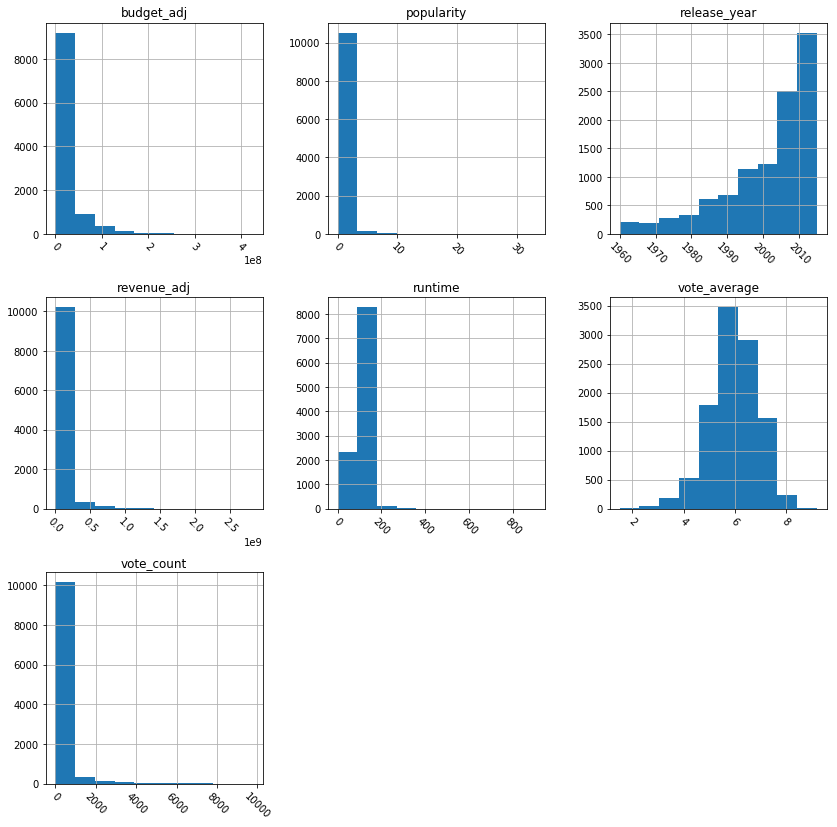

In [112]:
# Plot histogram grid
df[['popularity', 'runtime', 'release_date', 'vote_count',
    'vote_average', 'release_year', 'budget_adj', 'revenue_adj']].hist(figsize=(14,14), xrot=-45) 

# Clear the text "residue"
plt.show()

In [113]:
# summary statistics
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
count,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,1.073400e+04,1.073400e+04,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000,10734.000000
mean,0.652599,102.465903,219.782281,5.964440,2001.262064,1.776872e+07,5.199196e+07,0.221632,0.136482,0.061860,0.351686,0.126328,0.043786,0.442426,0.113099,0.084591,0.017142,0.030743,0.152413,0.037172,0.075275,0.159121,0.114030,0.015092,0.270635,0.024967,0.015279
std,1.004664,30.490113,578.737337,0.930293,12.819191,3.446209e+07,1.454073e+08,0.415364,0.343316,0.240911,0.477519,0.332234,0.204628,0.496697,0.316728,0.278285,0.129806,0.172630,0.359437,0.189191,0.263847,0.365806,0.317863,0.121926,0.444309,0.156033,0.122664
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210766,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387247,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.720314,112.000000,148.000000,6.600000,2011.000000,2.113258e+07,3.469851e+07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Which genres are most popular?

In [114]:
# most popular genres dataframe
popular_genres = genres_dummies.sum(axis=0).sort_values(ascending=False)

# convert index into column
popular_genres = popular_genres.reset_index()

# rename columns
popular_genres.rename(columns={'index': 'genre', 0: 'num_movies'}, inplace=True)

# clean up column name for dataframe
popular_genres['genre'] = popular_genres.genre.apply(lambda x: x[6:])

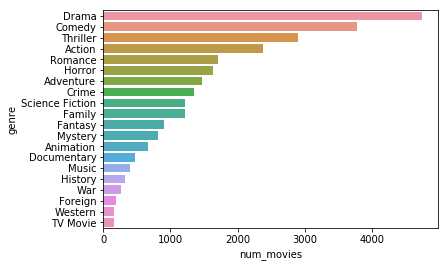

In [115]:
# popular_genres.plot(kind='bar')
sns.barplot(y=popular_genres.genre, x=popular_genres.num_movies)
plt.show()

### Which genres are most popular from year to year?

In [116]:
release_year_genres = df.groupby('release_year')['genre_Action',
                                               'genre_Adventure', 'genre_Animation', 'genre_Comedy', 'genre_Crime',
                                               'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy',
                                               'genre_Foreign', 'genre_History', 'genre_Horror', 'genre_Music',
                                               'genre_Mystery', 'genre_Romance', 'genre_Science Fiction',
                                               'genre_TV Movie', 'genre_Thriller', 'genre_War', 'genre_Western'].sum()

In [117]:
# rename genre_ columns
release_year_genres = release_year_genres.rename(columns = lambda x : str(x)[6:])

In [118]:
release_year_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8,5,0,8,2,0,13,3,2,1,5,7,1,0,6,3,0,6,2,6
1961,7,6,1,10,2,0,16,5,2,1,3,3,2,1,7,4,0,0,2,3
1962,8,7,0,5,3,0,21,2,1,1,4,5,1,4,5,2,0,7,3,3
1963,4,7,1,13,4,0,13,3,2,2,4,9,0,6,8,2,0,10,1,2
1964,5,5,2,16,10,0,20,4,4,1,3,6,5,4,9,4,0,9,3,1


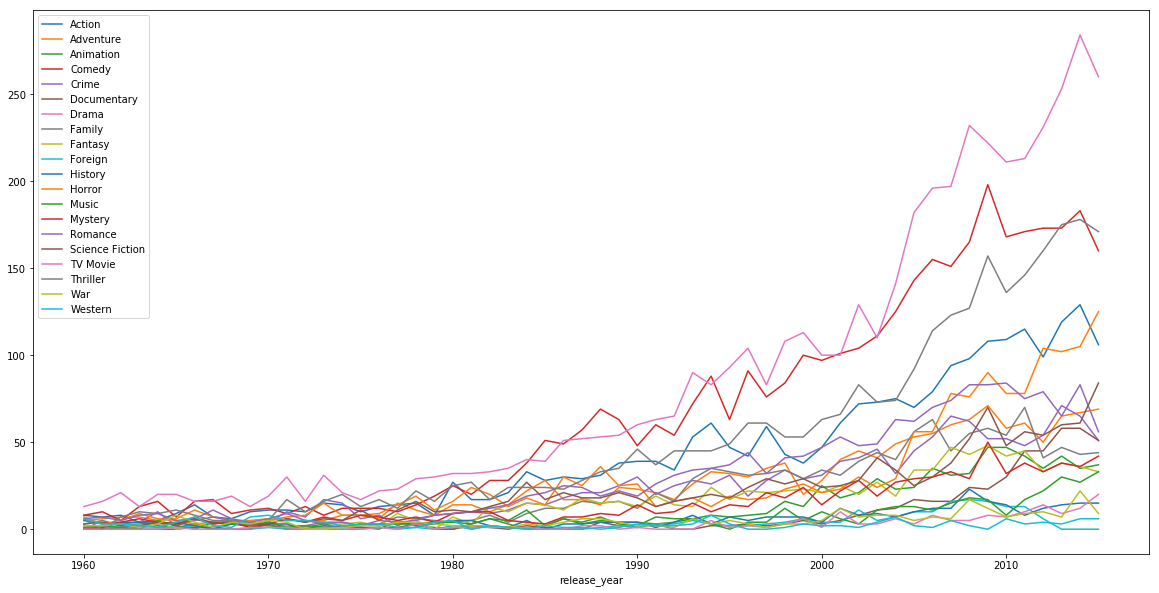

In [119]:
release_year_genres.plot(figsize=(20,10))
plt.show()

### Which genres are most popular from year to year (relative to the number of movies released in that year)?

In [120]:
number_movies_relesed_year = df.release_year.value_counts()

In [121]:
number_movies_relesed_year.loc[2011]

532

In [122]:
# relative popularity - normalized by number of movies released that year
# the sum will not add up to 1 for each year because a movie can have multiple genres
def normalize_genre_counts(row):
    return row/number_movies_relesed_year.loc[row.name]

release_year_genres_normalize = release_year_genres.apply(normalize_genre_counts, axis=1)

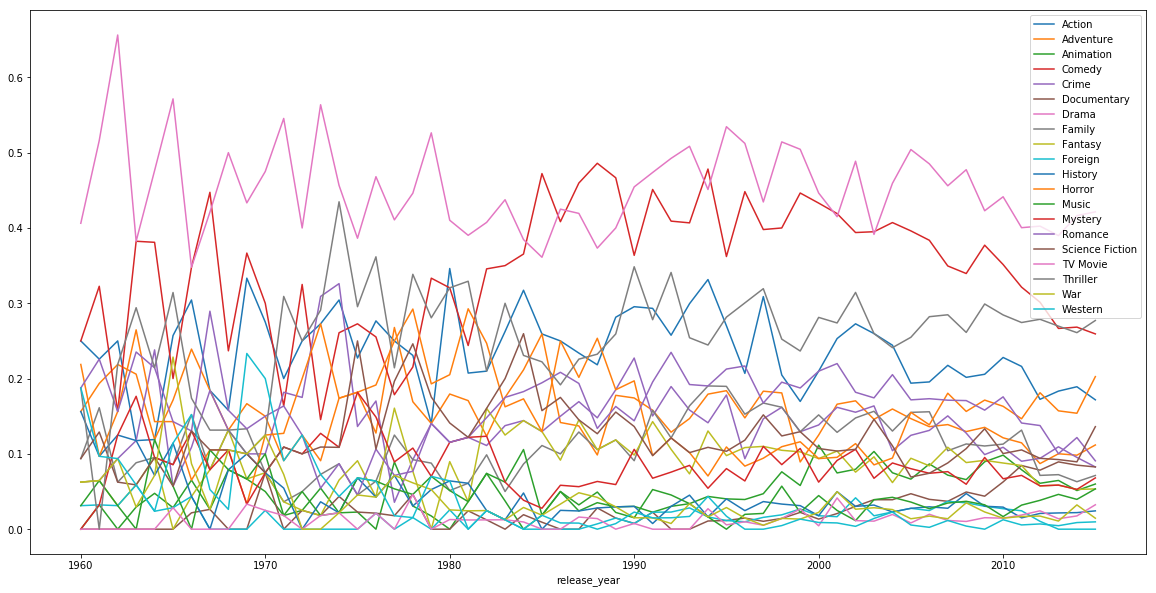

In [123]:
release_year_genres_normalize.plot(figsize=(20,10))
plt.show()

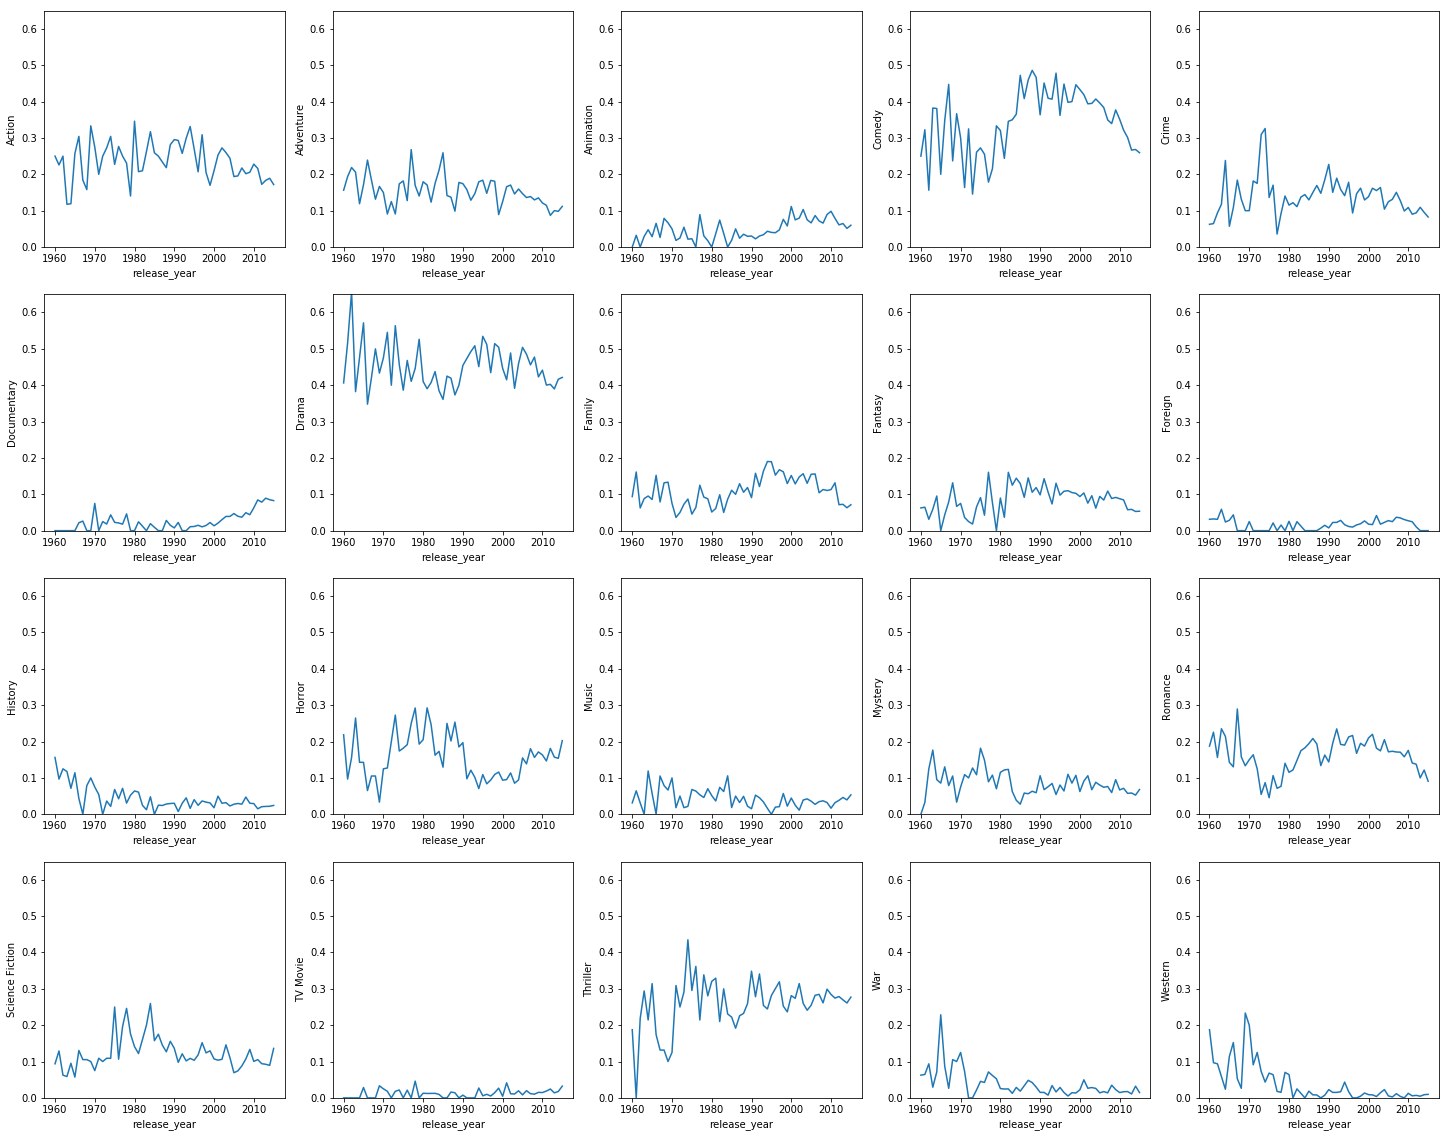

In [124]:
# Plot bar plot for each genre together as one plot
nrows = 4
ncols = 5

current_row = 0
current_col = 0

fig,ax = plt.subplots(nrows, ncols, figsize=(25,20))#, sharey=True)

for genre in release_year_genres_normalize.columns: 
#     plt.title(genre)
    plt.sca(ax[current_row,current_col])
    g = sns.lineplot(x=release_year_genres_normalize.index, y=release_year_genres_normalize[genre], legend=False)
    g.set(ylim=(0, 0.65))
    
    # update which plots to fill
    current_col += 1
    if (current_col%ncols == 0):
        current_col = 0
        current_row += 1

### What genres are the most profitable?

In [125]:
# create new variable for adjusted profit
df['profit'] = df.budget_adj = df.revenue_adj

In [126]:
df.profit.describe()

count    1.073400e+04
mean     5.199196e+07
std      1.454073e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.469851e+07
max      2.827124e+09
Name: profit, dtype: float64

#### Assume anything movies with adjusted profit of over $50M is considered profitable

In [127]:
profitable = df['profit'] > 50000000

In [128]:
profitable_df = df[profitable]

In [129]:
profitable_df.head()

,popularity,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,profit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,3/20/77,4428,7.9,1977,2.789712e+09,2.789712e+09,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.789712e+09
12,3.440519,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,100,5/30/03,3692,7.4,2003,1.024887e+09,1.024887e+09,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.024887e+09
13,6.715966,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,7/6/94,4856,8.1,1994,9.973333e+08,9.973333e+08,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,9.973333e+08
14,3.555720,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,Sam Mendes,122,9/15/99,1756,7.7,1999,4.664111e+08,4.664111e+08,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4.664111e+08
16,0.977410,BjÃ¶rk|Catherine Deneuve|David Morse|Peter Sto...,Lars von Trier,140,5/17/00,190,7.4,2000,5.069205e+07,5.069205e+07,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5.069205e+07


In [130]:
profitable_df.columns

Index(['popularity', 'cast', 'director', 'runtime', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'genre_Action', 'genre_Adventure', 'genre_Animation',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Family', 'genre_Fantasy', 'genre_Foreign', 'genre_History',
       'genre_Horror', 'genre_Music', 'genre_Mystery', 'genre_Romance',
       'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller',
       'genre_War', 'genre_Western', 'profit'],
      dtype='object')

In [131]:
profitable_df = profitable_df[['genre_Action',
       'genre_Adventure', 'genre_Animation', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy',
       'genre_Foreign', 'genre_History', 'genre_Horror', 'genre_Music',
       'genre_Mystery', 'genre_Romance', 'genre_Science Fiction',
       'genre_TV Movie', 'genre_Thriller', 'genre_War', 'genre_Western']]

In [132]:
# most profitable genres dataframe
profitable_genres = profitable_df.sum(axis=0).sort_values(ascending=False)

# convert index into column
profitable_genres = profitable_genres.reset_index()

# rename columns
profitable_genres.rename(columns={'index': 'genre', 0: 'num_movies'}, inplace=True)

# clean up column name for dataframe
profitable_genres['genre'] = profitable_genres.genre.apply(lambda x: x[6:])

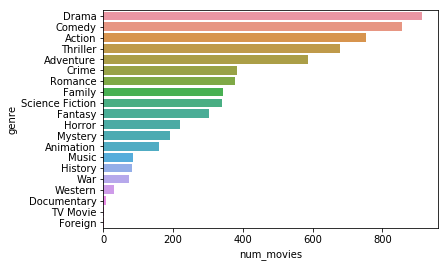

In [133]:
# popular_genres.plot(kind='bar')
sns.barplot(y=profitable_genres.genre, x=profitable_genres.num_movies)
plt.show()

### What kinds of properties are associated with movies that have high revenues?

**Features to considered:**
* Runtime
* Release_month
* budget_adj
* genres
* Director
* Cast

In [136]:
# select top 100 movies with highest revenue_http://localhost:8888/lab#What-kinds-of-properties-are-associated-with-movies-that-have-high-revenues%3Fadj
top100 = df.sort_values(by=['revenue_adj'], ascending=False)[:100]

#### Average Runtime of top 100 movies

In [137]:
top100.runtime.describe()

count    100.000000
mean     131.630000
std       26.168319
min       78.000000
25%      115.000000
50%      132.500000
75%      146.500000
max      201.000000
Name: runtime, dtype: float64

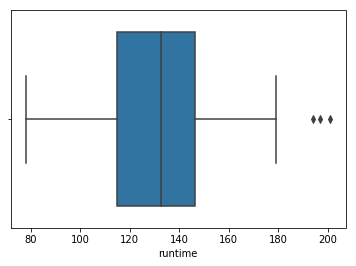

In [138]:
sns.boxplot(x='runtime', data=top100)

#### Release month of top 100 movies

In [139]:
top100['release_date'] = pd.to_datetime(top100.release_date) 

In [140]:
top100['release_month'] = top100.release_date.dt.month

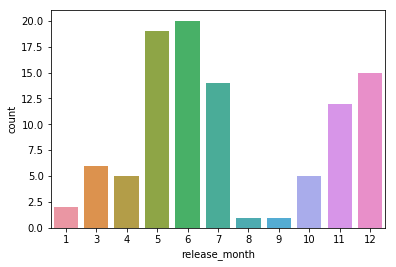

In [141]:
sns.countplot(x='release_month', data=top100)

#### Budget of top 100 movies

In [142]:
top100.budget_adj.describe()

count    1.000000e+02
mean     1.070078e+09
std      4.028286e+08
min      7.214689e+08
25%      8.078311e+08
50%      9.600996e+08
75%      1.141442e+09
max      2.827124e+09
Name: budget_adj, dtype: float64

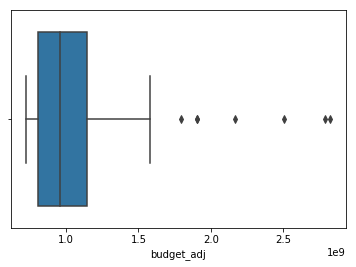

In [143]:
sns.boxplot(x='budget_adj', data=top100)

#### Genres of top 100 movies

In [144]:
top100_genres = top100[['genre_Action',
       'genre_Adventure', 'genre_Animation', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy',
       'genre_Foreign', 'genre_History', 'genre_Horror', 'genre_Music',
       'genre_Mystery', 'genre_Romance', 'genre_Science Fiction',
       'genre_TV Movie', 'genre_Thriller', 'genre_War', 'genre_Western']]

In [145]:
# most profitable genres dataframe
top100_genres = top100_genres.sum(axis=0).sort_values(ascending=False)

# convert index into column
top100_genres = top100_genres.reset_index()

# rename columns
top100_genres.rename(columns={'index': 'genre', 0: 'num_movies'}, inplace=True)

# clean up column name for dataframe
top100_genres['genre'] = top100_genres.genre.apply(lambda x: x[6:])

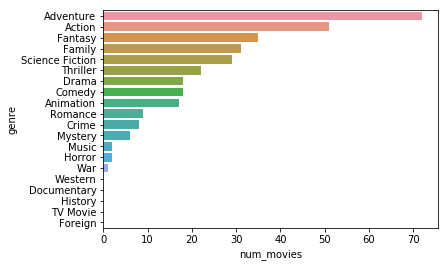

In [146]:
# popular_genres.plot(kind='bar')
sns.barplot(y=top100_genres.genre, x=top100_genres.num_movies)
plt.show()

#### Top Directors and Cast of top 100 movies

In [153]:
# top 3 directors
top100.director.value_counts()[0:3]

Steven Spielberg    7
Peter Jackson       6
George Lucas        4
Name: director, dtype: int64

In [155]:
top100.head()

,popularity,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,profit,release_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19995,9.432768,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,2009-12-10,8458,7.1,2009,2.827124e+09,2.827124e+09,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2.827124e+09,12
11,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,1977-03-20,4428,7.9,1977,2.789712e+09,2.789712e+09,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.789712e+09,3
597,4.355219,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,1997-11-18,4654,7.3,1997,2.506406e+09,2.506406e+09,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2.506406e+09,11
9552,2.010733,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,1973-12-26,1113,7.2,1973,2.167325e+09,2.167325e+09,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,2.167325e+09,12
578,2.563191,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,1975-06-18,1415,7.3,1975,1.907006e+09,1.907006e+09,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.907006e+09,6


In [167]:
# split pipe characters and count their number of appeared times
#argument:dataframe_col is the target dataframe&column; num is the number of the top factor
def find_top(dataframe_col, num=3):
    # split the characters in the input column and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    
    #count their number of appeared times and choose the top3
    top = new['top'].value_counts().head(num)
    
    return top

In [171]:
find_top(top100.cast, 5)

Daniel Radcliffe    8
Rupert Grint        8
Emma Watson         8
Harrison Ford       7
Ian McKellen        7
Name: top, dtype: int64

<a id='conclusions'></a>
## Conclusions

### To make one of the top movies (top 100) with the highest revenues, these are things you might want to choose:
* **Runtime**: ~115-146 minutes
* **Genre**: Adventure, Action, Fantasy
* **Budget**: At least ~$800M
* **Directors**: Steven Spielberg, Peter Jackson, George Lucas
* **Casts**: Daniel Radcliffe, Rupert Grint, Emma Watson, Harrison Ford, Ian McKellen        
* **Release Month**: May, June, July, December